In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
from scipy.stats import shapiro, spearmanr, chi2_contingency, ttest_ind
from sklearn.datasets import load_wine, make_classification
import warnings
warnings.filterwarnings("ignore")

# Hypothesis Testing using Python
* Here we are going to perform different tests of hypothesis on different datasets.
* First dataset is of Wine (Already inbuilt) and Second is a random dataset (created by us)

In [2]:
wine = load_wine()

In [3]:
wine_df = pd.DataFrame(wine.data, columns=wine.feature_names)
wine_df["target"] = wine.target

In [4]:
data, target = make_classification(n_samples=400, n_features=5, n_classes=2)

In [5]:
df = pd.DataFrame(data, columns=[f"feature{i}" for i in range(1,6)])
df["target"] = target

In [6]:
wine = wine_df.copy()

In [7]:
wine.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [8]:
df.head()

,feature1,feature2,feature3,feature4,feature5,target
0,-0.142014,0.889916,-0.212953,-0.727304,0.483113,0
1,-0.094950,0.438852,-0.141987,-0.470246,0.317178,1
2,0.770913,-0.162725,1.038009,-0.869430,-0.869951,0
3,0.274901,-2.285105,0.339706,-1.552836,0.141908,0
4,-0.265335,0.393926,-0.383927,-0.789381,0.695457,1


## Shapiro Test
* Shapiro also has values as Z-Test
* Statistical value and P-Value

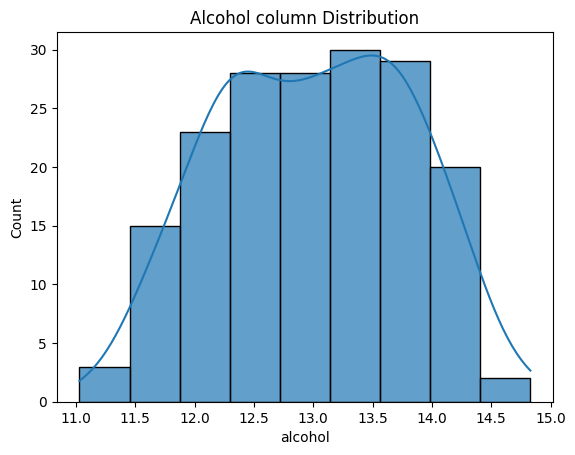

In [15]:
plt.title("Alcohol column Distribution")
sns.histplot(wine["alcohol"], kde=True, alpha=0.7)
plt.show()

In [16]:
# H0 -->  Data is normally distributed
# Ha --> Data is not normally distributed

# Checking whether to accept the null hypothesis or reject it.
# shapiro
sh_stat, sh_p= shapiro(wine["alcohol"])

print("Shapiro Statistical Value ; ", sh_stat)
print("Shapiro p_value : ", sh_p)

alpha = 0.05
if sh_p > alpha:
    print("Data is normally distributed (Accepting H0)")
else:
    print("Data is not normally distributed (Rejecting H0)")

Shapiro Statistical Value ;  0.981804609298706
Shapiro p_value :  0.020050711929798126
Data is not normally distributed (Rejecting H0)


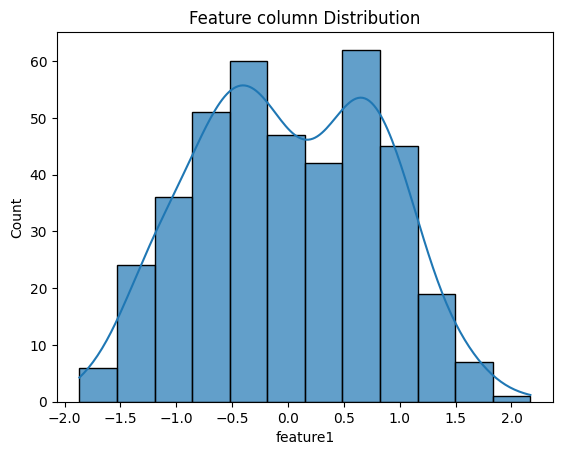

In [17]:
plt.title("Feature column Distribution")
sns.histplot(df["feature1"], kde=True, alpha=0.7)
plt.show()

In [20]:
# H0 -> Data is normally distributed
# Ha -> Data is not normally distributed

# Checking whether to accept the null hypothesis or reject it.
sh_stat, sh_p= shapiro(df["feature1"])

print("Shapiro Statistical Value ; ", sh_stat)
print("Shapiro p_value : ", sh_p)

alpha = 0.05
if sh_p > alpha:
    print("Data is normally distributed (Accepting H0)")
else:
    print("Data is not normally distributed (Rejecting H0)")

Shapiro Statistical Value ;  0.9842919707298279
Shapiro p_value :  0.0002468382299412042
Data is not normally distributed (Rejecting H0)


In [21]:
wine.columns

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline', 'target'],
      dtype='object')

## Spearman Test
* This test is performed to check if there is any correlation in two columns or not.
* it has values -1 -->Negative Dependency, 0 -->No Correlation, +1 --> Positive Dependency.
* values can lie nearby to the above values.

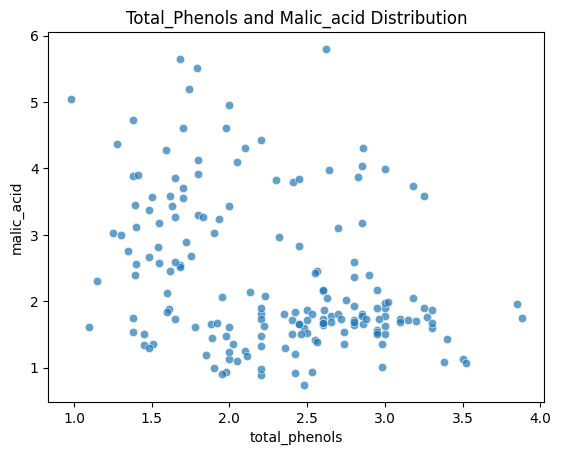

In [22]:
plt.title("Total_Phenols and Malic_acid Distribution")
sns.scatterplot(x=wine["total_phenols"],y=wine["malic_acid"], alpha=0.7)
plt.show()

In [23]:
# H0 -->  Total_phenol and malic acid are independent. there is no corelation
# Ha --> Total_phenol and malic acid are not independent.

# Checking wheather to accept or reject the null hypothesis
# spearman

sp_stats, sp_p= spearmanr(wine["total_phenols"], wine["malic_acid"])

print("Spearman Statistical Value : %.5f" %sp_stats)
print("Spearman p_value : %.5f" %sp_p)

alpha = 0.05
if sp_p > alpha:
    print("Total_phenol and malic_acid are independent(Accepting H0)")
else:
    print("Total_phenol and malic_acid are not independent(Rejecting H0)")

Spearman Statistical Value ; -0.28022
Spearman p_value : 0.00015
Total_phenol and malic_acid are not independent(Rejecting H0)


In [24]:
df.head()

,feature1,feature2,feature3,feature4,feature5,target
0,-0.142014,0.889916,-0.212953,-0.727304,0.483113,0
1,-0.094950,0.438852,-0.141987,-0.470246,0.317178,1
2,0.770913,-0.162725,1.038009,-0.869430,-0.869951,0
3,0.274901,-2.285105,0.339706,-1.552836,0.141908,0
4,-0.265335,0.393926,-0.383927,-0.789381,0.695457,1


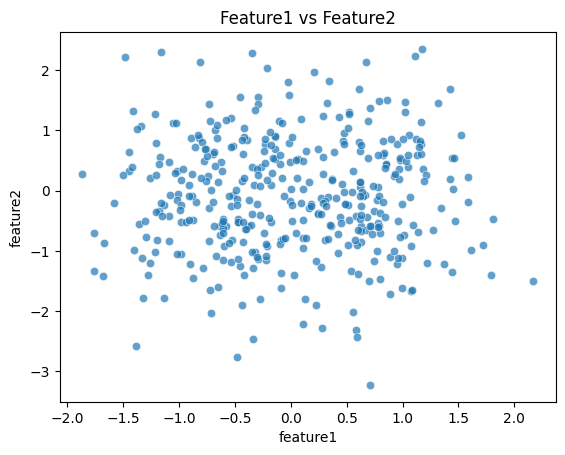

In [25]:
plt.title("Feature1 vs Feature2")
sns.scatterplot(x=df["feature1"],y=df["feature2"], alpha=0.7)
plt.show()

In [26]:
# H0 -->  Feature1 and Feature2 are independent. there is no corelation
# Ha --> Feature1 and Feature2 are not independent.
# Checking wheather to accept or reject the null hypothesis
# spearman

sp_stats, sp_p= spearmanr(df["feature1"], df["feature2"])

print("Spearman Statistical Value ; %.5f" %sp_stats)
print("Spearman p_value : %.5f" %sp_p)

alpha = 0.05
if sp_p > alpha:
    print("Feature1 and Feature2 are independent(Accepting H0)")
else:
    print("Feature1 and feature2 are not independent(Rejecting H0)")

Spearman Statistical Value ; 0.01927
Spearman p_value : 0.70081
Feature1 and Feature2 are independent(Accepting H0)


## T-Test

In [27]:
cat = pd.cut(wine["proanthocyanins"], bins=4, labels=[0,1,2,3])
cat

0      2
1      1
2      3
3      2
4      1
      ..
173    0
174    1
175    1
176    1
177    1
Name: proanthocyanins, Length: 178, dtype: category
Categories (4, int64): [0 < 1 < 2 < 3]

In [28]:
# cut in pandas are used to convert
# sequential --> Discrete
# Numerical --> categorical

wine["proanthocyanins"]=cat
#wine.head()

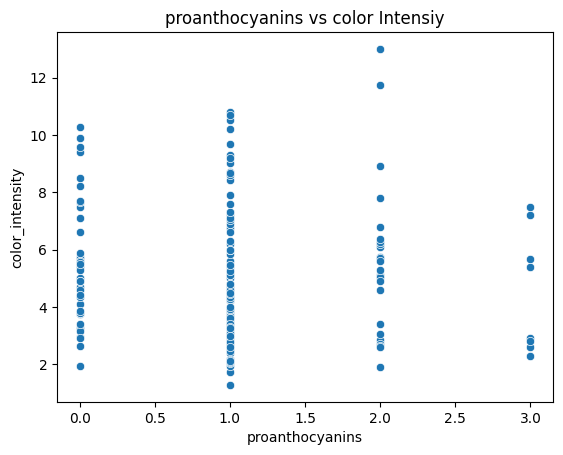

In [29]:
plt.title("proanthocyanins vs color Intensiy")
sns.scatterplot(x=wine["proanthocyanins"] ,y=wine["color_intensity"])
plt.show()

In [30]:
# H0 --> proanthocyanins and color intensity are independent
# Ha --> proanthocyanins and color are not independent
# checking wheather to accept or reject the null hypothesis
# T-Test
t_stats, t_p = ttest_ind(wine["proanthocyanins"],wine["color_intensity"])

print("T Statistical Value : %.5f" %t_stats)
print("p value for t_test : %.5f" %t_p)

alpha = 0.05
if sp_p > alpha:
    print("proanthocyanins and color_Intensity are independent(Accepting H0)")
else:
    print("proanthocyanins and color_intensity are not independent(Rejecting H0)")

T Statistical Value : -22.17444
p value for t_test : 0.00000
proanthocyanins and color_Intensity are independent(Accepting H0)


In [31]:
wine.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,3,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1,4.32,1.04,2.93,735.0,0


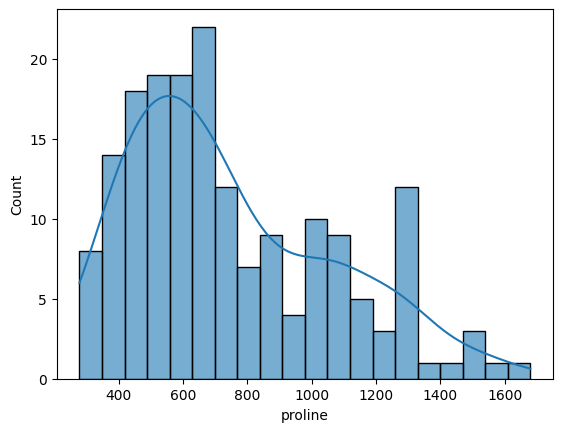

In [32]:
sns.histplot(x=wine["proline"], bins=20, alpha=0.6, legend=False, kde=True)
plt.show()

In [33]:
wine["proline"].mean()

746.8932584269663

In [34]:
sample1= np.random.choice(wine["proline"], size=34)
sample2= np.random.choice(wine["proline"], size=34)

In [35]:
# H0 --> Sample1 and Sample2 are not equal.
# Ha --> Sample1 and sample2 are equal.

t_stats, t_p = ttest_ind(sample1, sample2)

print("t-test statistical vale : %.5f" %t_stats)
print("t-test p value : %.5f" %t_p)

alpha=0.05
if t_p > alpha:
    print("Sample1 and Sample2 are not equal (Accepting H0)")
else:
    print("sample1 and sample2 are equal (Rejecting H0)")

t-test statistical vale : -0.31007
t-test p value : 0.75748
Sample1 and Sample2 are not equal (Accepting H0)


In [36]:
sample1.mean()

736.5294117647059

In [37]:
sample2.mean()

760.7941176470588

## CHI-2 Test / CHI Square Test

In [38]:
data = {"Gender":np.random.choice(["Male", "Female"], 80),
        "Subject":np.random.choice(["Med", "Eng"], 80)
}

In [39]:
course =pd.DataFrame(data)
course.head(10)

,Gender,Subject
0,Female,Med
1,Female,Eng
2,Male,Med
3,Male,Med
4,Female,Med
5,Female,Eng
6,Female,Eng
7,Female,Med
8,Male,Med
9,Male,Med


In [40]:
crstb = pd.crosstab(course["Gender"],course["Subject"])
crstb

Subject,Eng,Med
Gender,,
Female,22,18
Male,20,20


In [41]:
# H0 --> More males and females are doing medical and less males and females are doing engineering.
# Ha --> Above statement is not true.

chi_stat, chi_p, _, _ = chi2_contingency(crstb)

print("chi2 statistical value : %.5f" %chi_stat)
print("chi2 p value : %.5f" %chi_p)

alpha=0.05
if chi_p > alpha:
    print("More males and females are doing medical and less males and females are doing engineering. (Accepting H0)")
else:
    print("Above statement is not true. (Rejecting H0)")

chi2 statistical value : 0.05013
chi2 p value : 0.82285
More males and females are doing medical and less males and females are doing engineering. (Accepting H0)
